# Calcolo della Skewness e Normalizzazione

In [1]:
import pymongo
from pymongo import MongoClient
client = MongoClient('mongodb://127.0.0.1:27017')
db = client.sample

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import kurtosis, skew

### Dataset

In [3]:
samples = pd.read_csv('../features collection/test data/800 teams multi-target/800_teams_vectors.csv')
samples = samples.drop(samples.columns[0], axis=1)
samples

,team_nusers,team_degree,team_degree_centrality,team_betweenness_centrality,team_closeness_centrality,team_eigenvector_centrality,team_pagerank,team_avg_users_nshot,team_avg_users_in_degree,team_avg_users_out_degree,...,team_avg_users_diversity,team_avg_users_nskills,team_avg_users_nfollowers,team_avg_users_nfollowings,team_avg_users_avg_shots_ranking,team_avg_users_avg_shots_ntags,team_avg_users_avg_shots_ncomments,team_avg_users_avg_shots_nlikes,team_avg_users_avg_shots_nviews,team_avg_users_avg_shots_diversity
0,13,3,0.000739,0.000000,0.023267,0.003448,0.000498,26.307692,57.538462,106.692308,...,1.130473,5.153846,751.923077,368.153846,0.127613,6.819749,1.752576,57.695945,2463.556355,0.512648
1,1,1,0.000246,0.000000,0.000246,0.000000,0.000606,62.000000,29.000000,142.000000,...,1.458627,9.000000,180.000000,337.000000,0.249208,6.080645,1.500000,29.258065,415.774194,0.706431
2,3,0,0.000000,0.000000,0.000000,0.000000,0.000091,82.000000,76.666667,61.666667,...,1.535161,6.333333,482.333333,143.666667,0.080582,7.776788,1.398255,26.909147,834.309971,0.383246
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000091,6.666667,28.000000,90.333333,...,2.450929,7.000000,102.333333,154.666667,0.183303,6.534188,3.136752,47.247863,973.568376,0.491977
4,14,3,0.000739,0.000483,0.021347,0.000419,0.000592,19.357143,158.357143,178.785714,...,1.390344,5.500000,1268.357143,662.642857,0.206384,11.511849,14.609629,272.041319,5535.595162,1.060933
5,3,0,0.000000,0.000000,0.000000,0.000000,0.000091,17.000000,39.666667,387.000000,...,1.515483,6.666667,176.333333,880.000000,0.216817,9.916812,1.998252,33.279138,756.173514,1.222147
6,6,1,0.000246,0.000000,0.000329,0.000000,0.000472,35.833333,20.666667,129.666667,...,1.672976,6.166667,179.500000,290.500000,0.143695,7.052861,1.049340,22.714129,535.155653,0.612454
7,2,1,0.000246,0.000000,0.000246,0.000000,0.000606,51.500000,32.000000,126.500000,...,0.239667,3.500000,204.500000,270.500000,0.043287,9.496564,2.134021,20.701890,771.372852,0.466366
8,2,0,0.000000,0.000000,0.000000,0.000000,0.000091,22.000000,35.500000,274.500000,...,0.852601,3.000000,555.500000,822.000000,0.036456,9.750000,7.630952,123.964286,2784.071429,0.162475
9,19,4,0.000986,0.000208,0.022259,0.002148,0.000970,28.315789,54.000000,89.421053,...,1.175218,4.894737,329.684211,189.473684,0.158865,6.134135,2.359690,51.782825,1807.754835,0.520911


### Distribuzione delle features

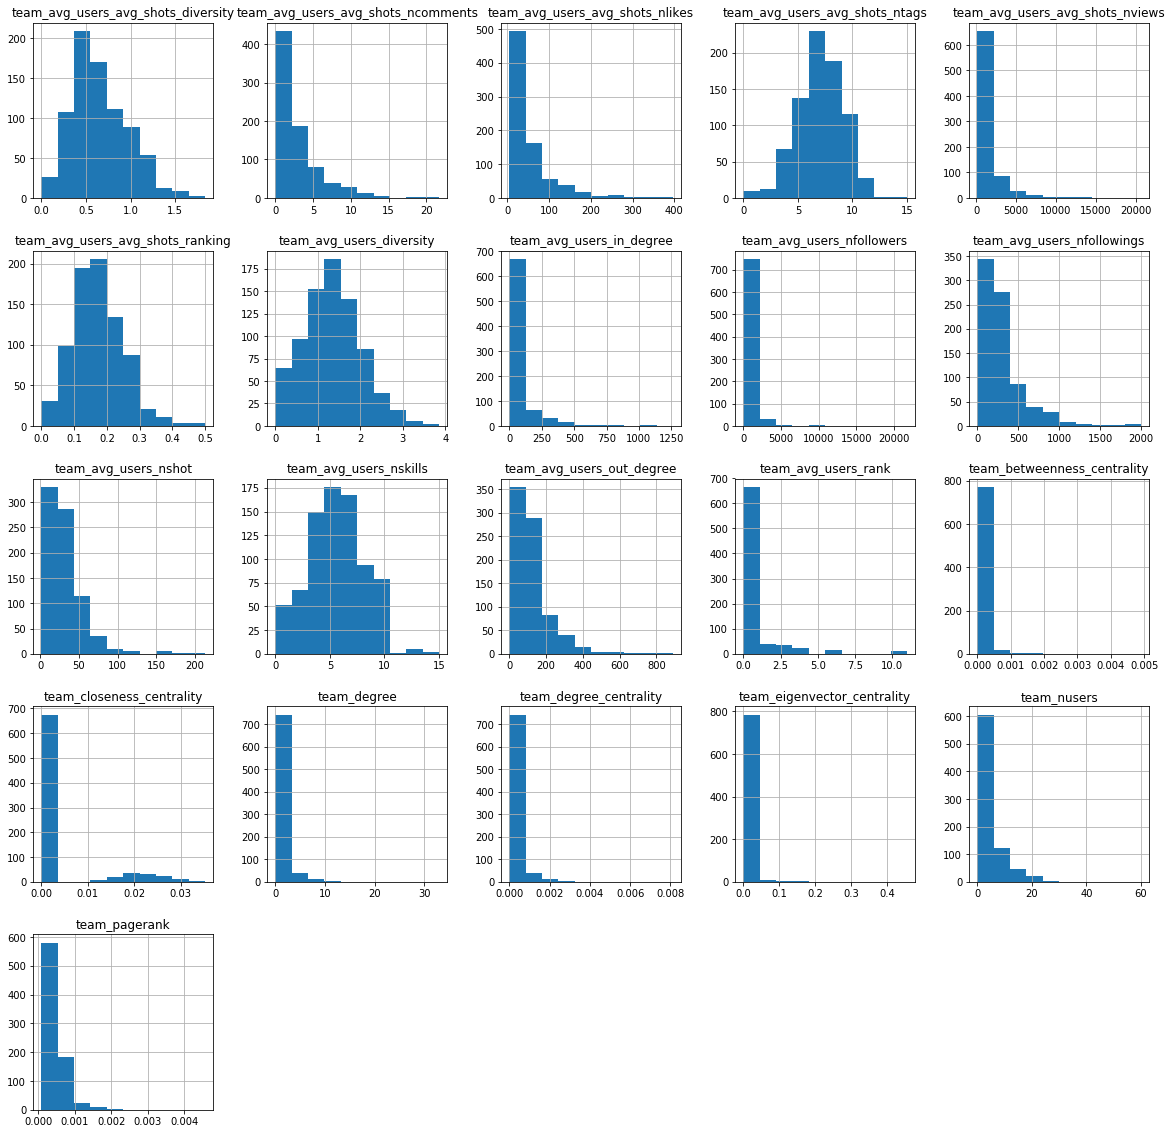

In [61]:

samples.hist()

fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.savefig("800_teams_distrib.pdf")
plt.show()

### SKEWNESS del Dataset

In [75]:
sample_skew = skew(samples, nan_policy='omit')

for sk ,f in zip(sample_skew, list(samples)):
    print round(sk, 3), '\t\t', f

3.862 		team_nusers
6.152 		team_degree
6.154 		team_degree_centrality
9.868 		team_betweenness_centrality
2.103 		team_closeness_centrality
13.507 		team_eigenvector_centrality
3.261 		team_pagerank
2.611 		team_avg_users_nshot
4.396 		team_avg_users_in_degree
2.546 		team_avg_users_out_degree
4.147 		team_avg_users_rank
0.213 		team_avg_users_diversity
-0.008 		team_avg_users_nskills
8.548 		team_avg_users_nfollowers
2.402 		team_avg_users_nfollowings
0.578 		team_avg_users_avg_shots_ranking
-0.236 		team_avg_users_avg_shots_ntags
2.256 		team_avg_users_avg_shots_ncomments
2.785 		team_avg_users_avg_shots_nlikes
4.11 		team_avg_users_avg_shots_nviews
0.654 		team_avg_users_avg_shots_diversity


Si può notare come alcune features risultino molto asimmetriche

### Applico Log-function al Dataset

In [4]:
samples_log = samples.apply(np.log)
samples_log = samples_log.replace(-np.inf, 0)
samples_log = samples_log.fillna(0)
samples_log

,team_nusers,team_degree,team_degree_centrality,team_betweenness_centrality,team_closeness_centrality,team_eigenvector_centrality,team_pagerank,team_avg_users_nshot,team_avg_users_in_degree,team_avg_users_out_degree,...,team_avg_users_diversity,team_avg_users_nskills,team_avg_users_nfollowers,team_avg_users_nfollowings,team_avg_users_avg_shots_ranking,team_avg_users_avg_shots_ntags,team_avg_users_avg_shots_ncomments,team_avg_users_avg_shots_nlikes,team_avg_users_avg_shots_nviews,team_avg_users_avg_shots_diversity
0,2.564949,1.098612,-7.210213,0.000000,-3.760719,-5.669961,-7.604910,3.269861,4.052454,4.669949,...,0.122636,1.639743,6.622634,5.908501,-2.058753,1.919823,0.561087,4.055187,7.809361,-0.668166
1,0.000000,0.000000,-8.310179,0.000000,-8.310179,0.000000,-7.408631,4.127134,3.367296,4.955827,...,0.377496,2.197225,5.192957,5.820083,-1.389467,1.805111,0.405465,3.376155,6.030142,-0.347530
2,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,-9.304651,4.406719,4.339467,4.121744,...,0.428635,1.845827,6.178635,4.967496,-2.518480,2.051143,0.335225,3.292466,6.726605,-0.959078
3,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,-9.304651,1.897120,3.332205,4.503507,...,0.896467,1.945910,4.628235,5.041272,-1.696615,1.877048,1.143188,3.855407,6.880968,-0.709323
4,2.639057,1.098612,-7.210213,-7.635494,-3.846844,-7.777640,-7.432004,2.963061,5.064853,5.186188,...,0.329551,1.704748,7.145478,6.496236,-1.578017,2.443377,2.681681,5.605954,8.618954,0.059149
5,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,-9.304651,2.833213,3.680511,5.958425,...,0.415734,1.897120,5.172376,6.779922,-1.528702,2.294231,0.692273,3.504931,6.628271,0.200609
6,1.791759,0.000000,-8.310179,0.000000,-8.019453,0.000000,-7.658532,3.578879,3.028522,4.864967,...,0.514604,1.819158,5.190175,5.671604,-1.940062,1.953433,0.048161,3.122987,6.282558,-0.490281
7,0.693147,0.000000,-8.310179,0.000000,-8.310179,0.000000,-7.408631,3.941582,3.465736,4.840242,...,-1.428505,1.252763,5.320568,5.600272,-3.139903,2.250930,0.758008,3.030225,6.648172,-0.762785
8,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,-9.304651,3.091042,3.569533,5.614951,...,-0.159464,1.098612,6.319869,6.711740,-3.311649,2.277267,2.032213,4.819994,7.931670,-1.817231
9,2.944439,1.386294,-6.921854,-8.477972,-3.805009,-6.143218,-6.938214,3.343420,3.988984,4.493356,...,0.161454,1.588161,5.798135,5.244250,-1.839700,1.813869,0.858530,3.947059,7.499841,-0.652176


### Distribuzione delle features con Log-function

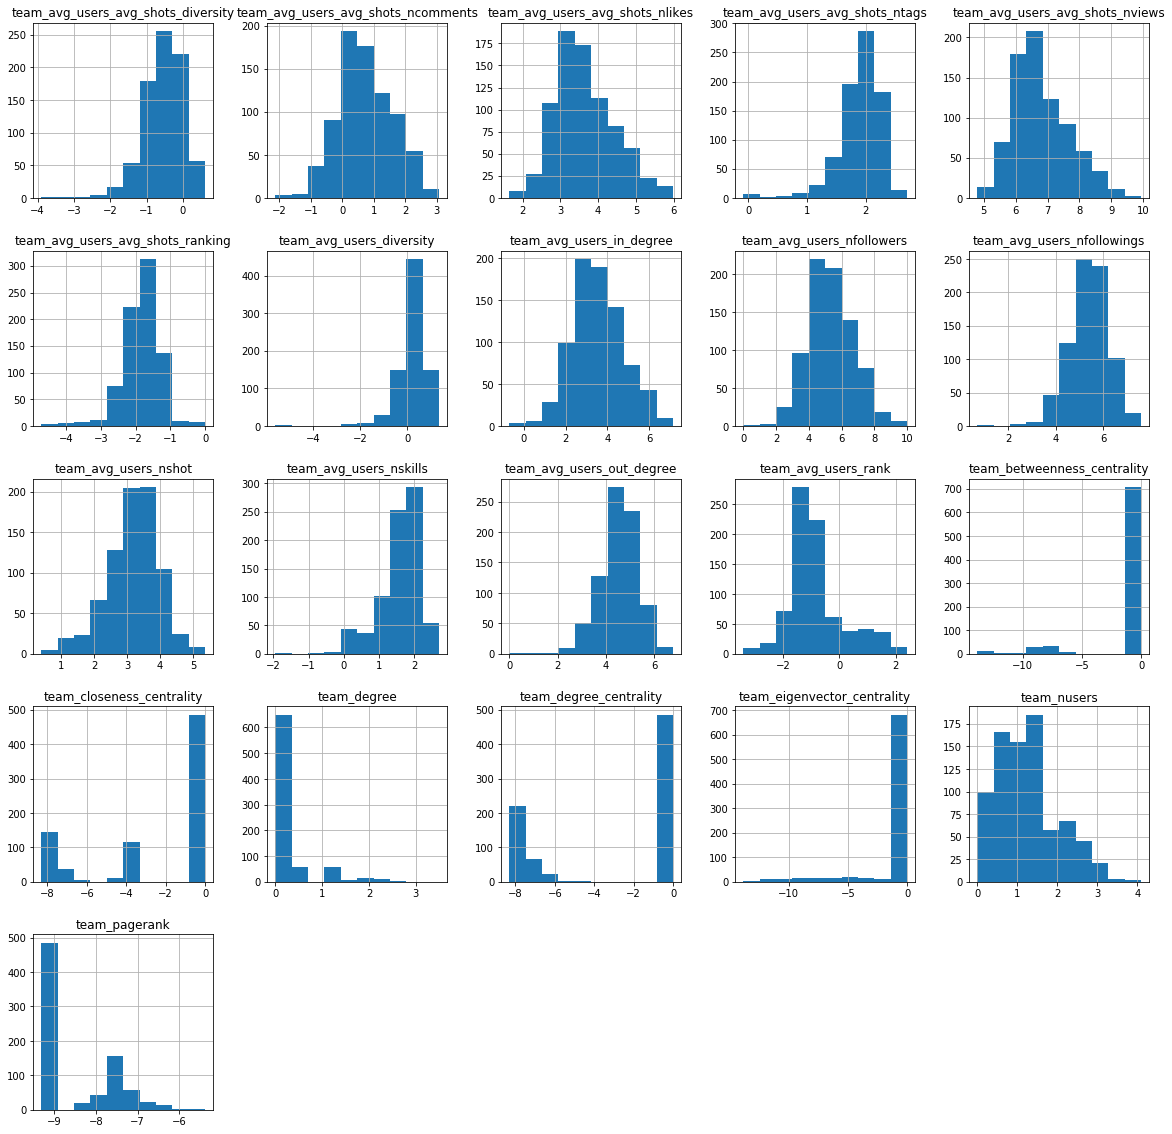

In [80]:
samples_log.hist()

fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.show()

### SKEWNESS del Dataset con Log-function

In [83]:
sample_skew_log = skew(samples_log, nan_policy='omit')

for sk ,f in zip(sample_skew_log, list(samples_log)):
    print round(sk, 3), '\t\t', f

0.382 		team_nusers
2.525 		team_degree
-0.475 		team_degree_centrality
-2.752 		team_betweenness_centrality
-0.819 		team_closeness_centrality
-2.768 		team_eigenvector_centrality
0.713 		team_pagerank
-0.515 		team_avg_users_nshot
0.159 		team_avg_users_in_degree
-0.63 		team_avg_users_out_degree
1.013 		team_avg_users_rank
-3.089 		team_avg_users_diversity
-1.43 		team_avg_users_nskills
0.208 		team_avg_users_nfollowers
-0.643 		team_avg_users_nfollowings
-1.052 		team_avg_users_avg_shots_ranking
-1.875 		team_avg_users_avg_shots_ntags
0.113 		team_avg_users_avg_shots_ncomments
0.529 		team_avg_users_avg_shots_nlikes
0.637 		team_avg_users_avg_shots_nviews
-0.967 		team_avg_users_avg_shots_diversity


l'asimmetria delle features si è ridotta, posso ora andare ad applicare una normalizzazione.

# Robust Scaler Normalization

In [5]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(samples_log)
samples_scaled = pd.DataFrame(transformer.transform(samples_log), columns=list(samples))
samples_scaled

,team_nusers,team_degree,team_degree_centrality,team_betweenness_centrality,team_closeness_centrality,team_eigenvector_centrality,team_pagerank,team_avg_users_nshot,team_avg_users_in_degree,team_avg_users_out_degree,...,team_avg_users_diversity,team_avg_users_nskills,team_avg_users_nfollowers,team_avg_users_nfollowings,team_avg_users_avg_shots_ranking,team_avg_users_avg_shots_ntags,team_avg_users_avg_shots_ncomments,team_avg_users_avg_shots_nlikes,team_avg_users_avg_shots_nviews,team_avg_users_avg_shots_diversity
0,1.600297,1.098612,-0.946843,0.000000,-0.911758,-5.669961,0.896478,-0.022589,0.372494,0.087823,...,-0.255785,-0.100753,0.796052,0.464537,-0.466405,-0.089010,-0.084854,0.520457,0.991869,-0.270483
1,-1.198978,0.000000,-1.091291,0.000000,-2.014739,0.000000,1.000000,0.847446,-0.033078,0.383258,...,0.181665,0.763306,-0.001545,0.380428,0.629363,-0.374880,-0.215255,-0.110256,-0.525801,0.190521
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.131194,0.542389,-0.478710,...,0.269443,0.218662,0.548351,-0.430610,-1.219078,0.238251,-0.274112,-0.187990,0.068280,-0.688752
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.415768,-0.053850,-0.084184,...,1.072448,0.373785,-0.316596,-0.360429,0.126495,-0.195607,0.402911,0.334893,0.199952,-0.329659
4,1.681175,1.098612,-0.946843,-7.635494,-0.932638,-7.777640,0.987672,-0.333957,0.971774,0.621320,...,0.099372,0.000000,1.087740,1.023630,0.320666,1.215726,1.692073,1.960874,1.682450,0.775236
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.465738,0.152327,1.419375,...,0.247300,0.298164,-0.013027,1.293491,0.401406,0.844045,0.025072,0.009356,-0.015599,0.978625
6,0.756471,0.000000,-1.091291,0.000000,-1.944255,0.000000,0.868197,0.291028,-0.233612,0.289361,...,0.417004,0.177329,-0.003097,0.239184,-0.272082,-0.005249,-0.514653,-0.345409,-0.310491,-0.014725
7,-0.442507,0.000000,-1.091291,0.000000,-2.014739,0.000000,1.000000,0.659131,0.025193,0.263809,...,-2.918224,-0.700547,0.069647,0.171329,-2.236484,0.736134,0.080154,-0.431570,0.001377,-0.406524
8,-0.442507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.204070,0.086634,1.064418,...,-0.739992,-0.939470,0.627144,1.228632,-2.517670,0.801769,1.147859,1.230841,1.096198,-1.922587
9,2.014455,1.386294,-0.908976,-8.477972,-0.922495,-6.143218,1.248107,0.052064,0.334924,-0.094674,...,-0.189157,-0.180703,0.336076,-0.167343,-0.107768,-0.353054,0.164386,0.420023,0.727849,-0.247494


# Load target

In [6]:
target = pd.read_csv('../features collection/test data/800 teams multi-target/800_teams_nlikes_target.csv')
target = target.drop(target.columns[0], axis=1)

In [7]:
target_log = target.apply(np.log)
target_log = target_log.replace(-np.inf, 0)
target_log = target_log.fillna(0)

In [8]:
transformer = RobustScaler().fit(target_log)
target_scaled = pd.DataFrame(transformer.transform(target_log), columns=['likes'])
target_scaled

,likes
0,1.118854
1,-0.195206
2,0.433844
3,-0.528283
4,1.656017
5,-0.229900
6,0.297905
7,-0.082064
8,0.170175
9,0.962676


# Fit Lasso Regression

In [53]:
from scipy.stats import uniform as sp_rand
import random
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.model_selection import GridSearchCV

# prepare a uniform distribution to sample for the alpha parameter
param = []
for i in range(10):
    param.append(random.uniform(0, 1)) 
param_grid = {'alpha': param}
# create and fit a ridge regression model, testing random alpha values
model = Lasso()
rsearch = GridSearchCV(estimator=model, param_grid=param_grid)
rsearch.fit(samples_scaled, target_scaled)
# print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)


0.9787232728795737
0.026168481808


# Check Lasso Accuracy

In [81]:
x_train = samples_scaled[0:400]
y_train = target_scaled[0:400]
x_test = samples_scaled[400:800]
y_test = target_scaled[400:800]

In [82]:
regressor = Lasso(alpha=0.026)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)

In [83]:
print regressor.score(x_test,y_test)

0.9794542125007829


# Fit SVR

In [77]:
from scipy.stats import uniform as sp_rand
import random
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# prepare a uniform distribution to sample for the alpha parameter
param_grid={
            "C": [1e0, 1e1, 1e2, 1e3], 
            "gamma": np.logspace(-2, 2, 5),
            "epsilon":  [0, 0.01, 0.1, 0.5, 1, 2, 4]
           }

# create and fit a ridge regression model, testing random alpha values
model = SVR(kernel='rbf', gamma=0.1)
rsearch = GridSearchCV(estimator=model, param_grid=param_grid)
rsearch.fit(samples_scaled, target_scaled)

# print(rsearch)
# summarize the results of the random parameter search
print 'score: ', rsearch.best_score_ 
print 'C: ', rsearch.best_estimator_.C 
print 'gsmma: ', rsearch.best_estimator_.gamma 
print 'epsilon: ', rsearch.best_estimator_.epsilon 

score:  0.976673753040899
C:  10.0
gsmma:  0.01
epsilon:  0.01


# Check SVR Accuracy

In [78]:
regressor = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.01)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)

In [79]:
print regressor.score(x_test,y_test)

0.9768563275033267
